In [1]:
%load_ext autoreload
%autoreload 2

# Load data

In [2]:
import os
from matpower import start_instance, path_matpower
import pandapower as pp
from pandapower.converter import from_mpc

In [3]:
case_name = 'case9.m'

In [4]:
case_path = os.path.join(path_matpower, 'data', case_name)
with open(case_path) as f:
    for line in f:
        print(line)

function mpc = case9

%CASE9    Power flow data for 9 bus, 3 generator case.

%   Please see CASEFORMAT for details on the case file format.

%

%   Based on data from p. 70 of:

%

%   Chow, J. H., editor. Time-Scale Modeling of Dynamic Networks with

%   Applications to Power Systems. Springer-Verlag, 1982.

%   Part of the Lecture Notes in Control and Information Sciences book

%   series (LNCIS, volume 46)

%

%   which in turn appears to come from:

%

%   R.P. Schulz, A.E. Turner and D.N. Ewart, "Long Term Power System

%   Dynamics," EPRI Report 90-7-0, Palo Alto, California, 1974.



%   MATPOWER



%% MATPOWER Case Format : Version 2

mpc.version = '2';



%%-----  Power Flow Data  -----%%

%% system MVA base

mpc.baseMVA = 100;



%% bus data

%	bus_i	type	Pd	Qd	Gs	Bs	area	Vm	Va	baseKV	zone	Vmax	Vmin

mpc.bus = [

	1	3	0	0	0	0	1	1	0	345	1	1.1	0.9;

	2	2	0	0	0	0	1	1	0	345	1	1.1	0.9;

	3	2	0	0	0	0	1	1	0	345	1	1.1	0.9;

	4	1	0	0	0	0	1	1	0	345	1	1.1	0.9;

	5	1	90	30	0	0	1	1	0	345

In [5]:
m = start_instance()

In [6]:
filename = os.path.join(os.path.dirname(os.getcwd()), 'data', f"{case_name.split('.')[0]}.mat").replace("\\","/")

In [7]:
m.eval(f'mpc = loadcase("{case_name}");')
m.eval(f'save("{filename}","mpc", "-v6");')

In [8]:
net = from_mpc(filename)

# Run power flow

In [9]:
pp.runpp(net)

In [10]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.040000,0.000000,-71.641021,-27.045924
1,1.025000,9.280005,-163.000000,-6.653660
2,1.025000,4.664751,-85.000000,10.859709
3,1.025788,-2.216788,0.000000,0.000000
4,1.012654,-3.687396,90.000000,30.000000
5,1.032353,1.966716,0.000000,0.000000
6,1.015883,0.727536,100.000000,35.000000
7,1.025769,3.719701,0.000000,0.000000
8,0.995631,-3.988805,125.000000,50.000000


In [11]:
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,71.641021,27.045924,-71.641021,-23.923127,-2.842171e-14,3.122797,0.123220,0.123220,0.123220,1.040000,0.000000,1.025788,-2.216788,29.452393
1,30.703670,1.030006,-30.537263,-16.543365,1.664069e-01,-15.513359,0.050118,0.057394,0.057394,1.025788,-2.216788,1.012654,-3.687396,13.718599
2,-59.462737,-13.456635,60.816586,-18.074836,1.353849e+00,-31.531470,0.100751,0.102848,0.102848,1.012654,-3.687396,1.032353,1.966716,40.971582
3,85.000000,-10.859709,-85.000000,14.955327,-1.421085e-14,4.095618,0.139904,0.139904,0.139904,1.025000,4.664751,1.032353,1.966716,27.866965
4,24.183414,3.119508,-24.095417,-24.295823,8.799657e-02,-21.176314,0.039527,0.056368,0.056368,1.032353,1.966716,1.015883,0.727536,22.455395
5,-75.904583,-10.704177,76.379866,-0.797331,4.752836e-01,-11.501509,0.126276,0.124616,0.126276,1.015883,0.727536,1.025769,3.719701,30.182869
6,-163.000000,9.178149,163.000000,6.653660,0.000000e+00,15.831809,0.266346,0.266346,0.266346,1.025769,3.719701,1.025000,9.280005,63.662730
7,86.620134,-8.380817,-84.320163,-11.312751,2.299971e+00,-19.693569,0.141975,0.142997,0.142997,1.025769,3.719701,0.995631,-3.988805,34.179600
8,-40.679837,-38.687249,40.937352,22.893121,2.575142e-01,-15.794128,0.094359,0.076519,0.094359,0.995631,-3.988805,1.025788,-2.216788,22.554017


In [12]:
net.res_ext_grid

,p_mw,q_mvar
0,71.641021,27.045924


In [13]:
net.res_load

,p_mw,q_mvar
0,90.0,30.0
1,100.0,35.0
2,125.0,50.0


In [14]:
net.res_gen

,p_mw,q_mvar,va_degree,vm_pu
0,163.0,6.653660,9.280005,1.025
1,85.0,-10.859709,4.664751,1.025


# Plot power flow

In [15]:
import pandapower.plotting as plot
import numpy as np

In [16]:
colors = ["b", "g", "r", "c", "y"]
%matplotlib inline

In [19]:
plot.create_generic_coordinates(net, respect_switches=True, overwrite=True) 

This pandapower network includes the following parameter tables:
   - bus (9 elements)
   - load (3 elements)
   - gen (2 elements)
   - ext_grid (1 element)
   - line (9 elements)
   - poly_cost (3 elements)
   - bus_geodata (9 elements)
 and the following results tables:
   - res_bus (9 elements)
   - res_line (9 elements)
   - res_ext_grid (1 element)
   - res_load (3 elements)
   - res_gen (2 elements)

In [31]:
cmap_list=[((0.975, 0.985), "green"), ((0.985, 1.0), "yellow"), ((1.0, 1.03), "red")]
cmap, norm = plot.cmap_discrete(cmap_list)
bc = plot.create_bus_collection(net, net.bus.index, size=0.02, zorder=2, cmap=cmap, norm=norm)

cmap_list=[((10, 40), "green"), ((40, 55), "yellow"), ((55, 60), "red")]
cmap, norm = plot.cmap_discrete(cmap_list)
lc = plot.create_line_collection(net, net.line.index, zorder=1, cmap=cmap, norm=norm, linewidths=2, use_bus_geodata=True)

buses = net.bus.index.tolist() # list of all bus indices
buses_shift = net.bus.index + 1
buses_shift = buses_shift.tolist()
coords = zip(net.bus_geodata.x.loc[buses].values, net.bus_geodata.y.loc[buses].values) # tuples of all bus coords
bic = plot.create_annotation_collection(size=0.1, texts=np.char.mod('%d', buses_shift), coords=coords, zorder=3, color=colors[0])

<AxesSubplot:>

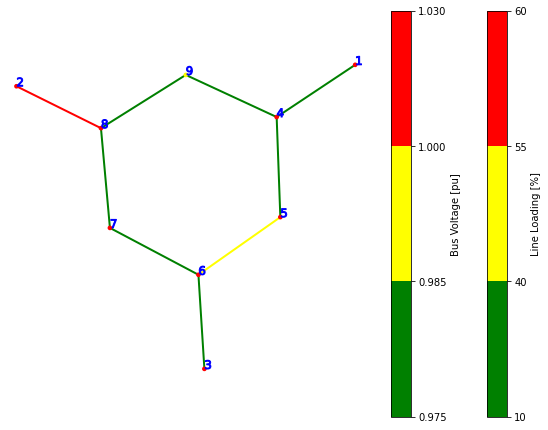

In [32]:
plot.draw_collections([lc, bc, bic], figsize=(8,6)) # plot lines, buses and bus indices